<div class="frontmatter text-center">
<h2> MATH5027 Scientific Python, Fall 2017</h2>
<h2> Homework 3, Due: Tuesday October 17th, 3pm </h2>
</div>

Instructions: complete the selection of exercises from the week's class notebooks. Use markdown cells between code examples to explain.

### class 7
1) Generate data with $x \in [0,3]$ and $y=e^{-x+1}x^2+\text{gaussian noise*0.15}$. Plot it in a scatter plot.



2) Using the data contained in the file stockholm_data.dat:
* Calculate the average temperature of each trimester and plot it (*Hint*: use np.logical_and to calculate the `and` between two arrays). Can you do it with one line of code only? 
* Plot the yearly records (that is maximum and minimum temperature) recorded each year from 1800 to 2010.


3) By using the API exchange rate, get the rates each 3 months from 1999 to 2016. Create a csv file (you can look up the module ```csv``` or just write your own functions) with the rate for the currencies Euro, British Pound Sterling, Hungarian Forint, Japanese Yen, in this time span.
Use numpy to load this csv file and:
* plot in the same figure the yearly averages of these currencies over time.
* plot their moving average in a 5 year window.
* plot the maximum in each 2 years window for EUR and HUF.


### class 7 Answers

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.random.uniform(0,4,400)
y = np.exp(-x+1)*(x*x) + (np.random.standard_normal()*0.15)


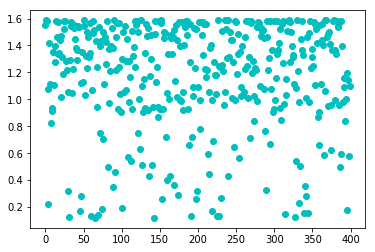

In [2]:
plt.plot(y, 'co')

In [3]:
stockholm_data = np.genfromtxt('C:/Users/Cagdas/OneDrive/CEU/OneDrive - Central European University/Fall 2017/Python/class7/stockholm_temperatures.dat')
np.size(stockholm_data), len(stockholm_data), 215*365

(309724, 77431, 78475)

In [4]:
x = stockholm_data # [year, month, day, temp]


* Plot the yearly records (that is maximum and minimum temperature) recorded each year from 1800 to 2010.

In [5]:
meanlist = []
maxlist = []
minlist = []
years = []

for i in np.unique(x[:,0]):
    
    mask = (x[:,0] == i)
    
    year_max = max(x[mask,3])
    maxlist.append(year_max)
    
    year_min = min(x[mask,3])
    minlist.append(year_min)
    
    year_mean = np.mean(x[mask,3])
    meanlist.append(year_mean)
    
    years.append(i)

len(meanlist), maxlist[:5], minlist[:5], years[:5]

(212,
 [22.100000000000001,
  25.100000000000001,
  21.800000000000001,
  22.5,
  24.800000000000001],
 [-19.300000000000001, -17.5, -24.800000000000001, -21.5, -20.5],
 [1800.0, 1801.0, 1802.0, 1803.0, 1804.0])

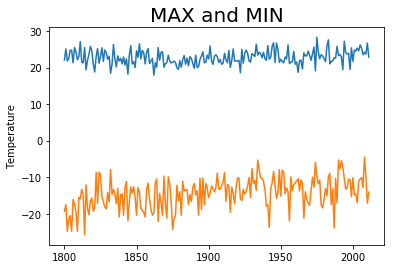

In [6]:
plt.plot(years, maxlist)
plt.plot(years, minlist)

plt.title("MAX and MIN", fontsize=20,color='black')
plt.ylabel("Temperature")

plt.figure(figsize=(8, 40))

plt.show()

* Calculate the average temperature of each trimester and plot it (Hint: use np.logical_and to calculate the and between two arrays). Can you do it with one line of code only?

In [7]:
quarters = np.arange(1,5)
Q1mask = x[:,1] < 4
Q2mask = np.logical_and(x[:,1]>3, x[:,1]<7)
Q3mask = np.logical_and(x[:,1]>6, x[:,1]<10)
Q4mask = x[:,1] > 9

In [8]:
quarter_means = []

quarter_means.append(np.mean(x[Q1mask][:,3]))
quarter_means.append(np.mean(x[Q2mask][:,3]))
quarter_means.append(np.mean(x[Q3mask][:,3]))
quarter_means.append(np.mean(x[Q4mask][:,3]))

print(quarter_means)

[-2.3370445873190109, 9.371781049139539, 15.120785479901558, 2.5042145200984414]


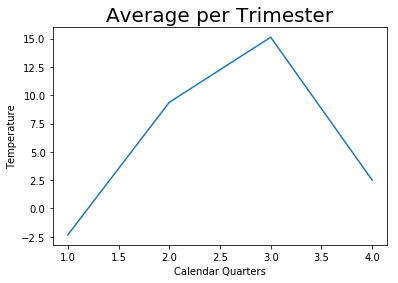

In [9]:
plt.plot(quarters, quarter_means)

plt.title("Average per Trimester", fontsize=20,color='black')
plt.ylabel("Temperature")
plt.xlabel("Calendar Quarters")

plt.show()

3) By using the API exchange rate, get the rates each 3 months from 1999 to 2016. Create a csv file (you can look up the module ```csv``` or just write your own functions) with the rate for the currencies Euro, British Pound Sterling, Hungarian Forint, Japanese Yen, in this time span.
Use numpy to load this csv file and:
* plot in the same figure the yearly averages of these currencies over time.
* plot their moving average in a 5 year window.
* plot the maximum in each 2 years window for EUR and HUF.

In [10]:
from datetime import date, datetime, timedelta
import urllib.request
import json

def perdelta(start, end, delta):
    curr = start
    while curr < end:
        yield curr
        curr += delta

datelist = []
for result in perdelta(date(1999, 1, 1), date(2016, 1, 1), timedelta(days=90)):
    datelist.append(result)
    
app_id = open("C:/Users/Cagdas/OneDrive/CEU/OneDrive - Central European University/Fall 2017/Python/class6/api_id.txt").read().strip()


url_list = []
for date in datelist:   
    base_url = "http://openexchangerates.org/api"
    id_str   = "app_id=%s" % app_id
    url_list.append("%s/historical/%s.json?%s" % (base_url, date, id_str))


text_files = []
for url in url_list:   
    request = urllib.request.Request(url)
    result = urllib.request.urlopen(request)
    text_files.append(result.read())
    

data = [json.loads(text_files[i]) for i in range(len(text_files))]

dic = {}
for i in range(len(datelist)):
    dic[(datelist[i].year, datelist[i].month)] = data[i]

In [144]:
#report these ['EUR', 'GPB', 'HUF', 'JPY']
import csv

dict_data1 = [dic[key]['rates']['EUR'] for key in dic if 'EUR' in dic[key]['rates']]
dict_data2 = [dic[key]['rates']['GBP'] for key in dic if 'GBP' in dic[key]['rates']]
dict_data3 = [dic[key]['rates']['HUF'] if 'HUF' in dic[key]['rates'] else 223 for key in dic] #use average for one missing
dict_data4 = [dic[key]['rates']['JPY'] for key in dic if 'JPY' in dic[key]['rates']]

values = (dict_data1, dict_data2, dict_data3, dict_data4)

csv_file = "forex.csv"

with open(csv_file, 'w') as csvfile:
    writer = csv.writer(csvfile, delimiter='\n')
    writer.writerows(values)
    
    
csvfile.close()

In [146]:
from numpy import genfromtxt
my_data = genfromtxt('forex.csv')

In [260]:
my_data = my_data.reshape(4,69)

In [191]:
#report these ['EUR', 'GPB', 'HUF', 'JPY']
a = my_data[0]
b = np.array([i.year for i in datelist])
eur_array = np.column_stack((a,b))

gbp_array = np.column_stack((my_data[1],b))
huf_array = np.column_stack((my_data[2],b))
jpy_array = np.column_stack((my_data[3],b))

In [259]:
all_array = [eur_array, gbp_array, huf_array, jpy_array]

In [255]:
Eurmeanlist = []
years = []

for i in np.unique(all_array[0][:,1]):
    
    mask = (all_array[0][:,1] == i)

    year_mean = np.mean(all_array[0][mask,0])
    Eurmeanlist.append(year_mean)

    years.append(i)

In [256]:
Gbpmeanlist = []

for i in np.unique(all_array[1][:,1]):
    
    mask = (all_array[1][:,1] == i)

    year_mean = np.mean(all_array[1][mask,0])
    Gbpmeanlist.append(year_mean)

In [257]:
Hufmeanlist = []

for i in np.unique(all_array[2][:,1]):
    
    mask = (all_array[2][:,1] == i)

    year_mean = np.mean(all_array[2][mask,0])
    Hufmeanlist.append(year_mean)

In [258]:
Jpymeanlist = []

for i in np.unique(all_array[3][:,1]):
    
    mask = (all_array[3][:,1] == i)

    year_mean = np.mean(all_array[3][mask,0])
    Jpymeanlist.append(year_mean)

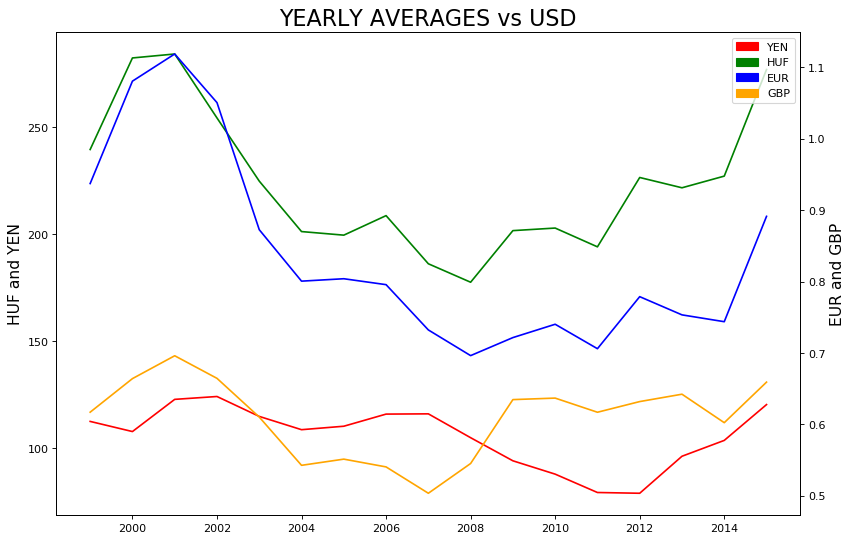

In [262]:
# plot in the same figure the yearly averages of these currencies over time.
import matplotlib.dates as mdate
import matplotlib.patches as mpatches

plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

ax = plt.gca()
ax2 = ax.twinx()

ax.plot(years, Hufmeanlist, color = "green")
ax.plot(years, Jpymeanlist, color = "red")

ax2.plot(years, Eurmeanlist, color = "blue")
ax2.plot(years, Gbpmeanlist, color = "orange")

plt.title("YEARLY AVERAGES vs USD", fontsize=20,color='black')
ax.set_ylabel("HUF and YEN",fontsize=14,color='black')
ax2.set_ylabel("EUR and GBP",fontsize=14,color='black')

red_patch = mpatches.Patch(color='red', label='YEN')
green_patch = mpatches.Patch(color='green', label='HUF')
blue_patch = mpatches.Patch(color='blue', label='EUR')
orange_patch = mpatches.Patch(color='orange', label='GBP')
plt.legend(handles=[red_patch, green_patch, blue_patch, orange_patch])

plt.show()